In [1]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
# Upload your data as a csv file and load it as a data frame 
df = pd.read_excel('Beer Dataset.xlsx').dropna()
df.head()

,Beer Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,0.0,Budweiser,144,15,4.7,0.43
3,1.0,Schlitz,151,19,4.9,0.43
4,2.0,Lowenbrau,157,15,0.9,0.48
5,3.0,Kronenbourg,170,7,5.2,0.73
6,4.0,Heineken,152,11,5,0.77


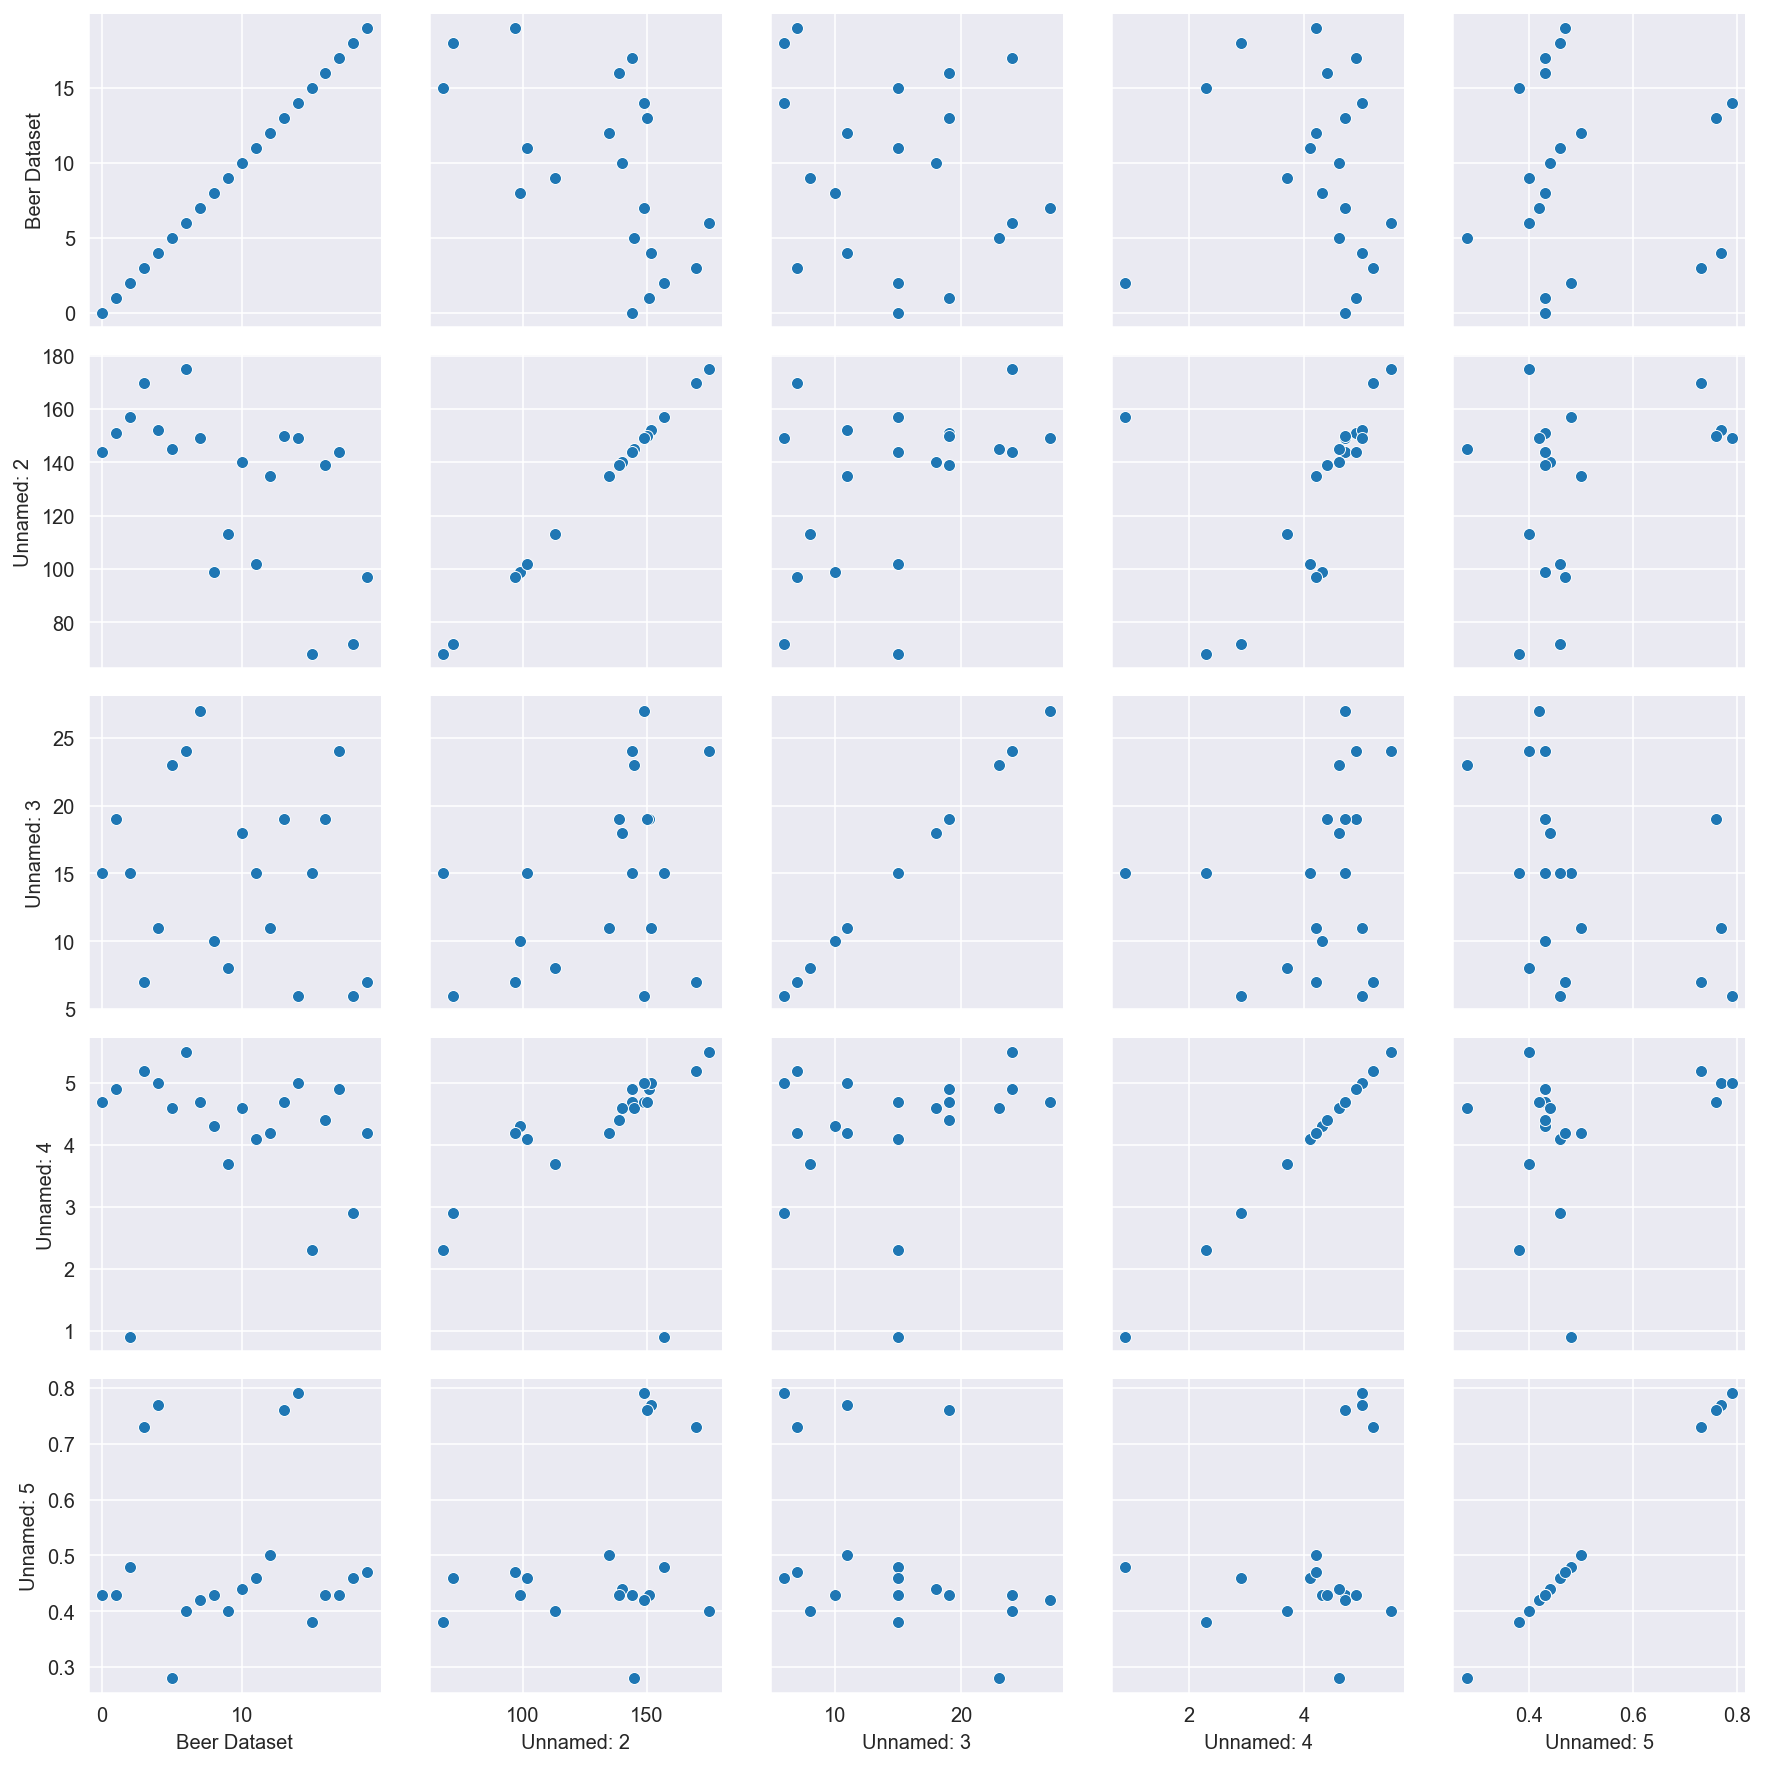

In [3]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(df)
g.map(sns.scatterplot);

C:\Users\mayank\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


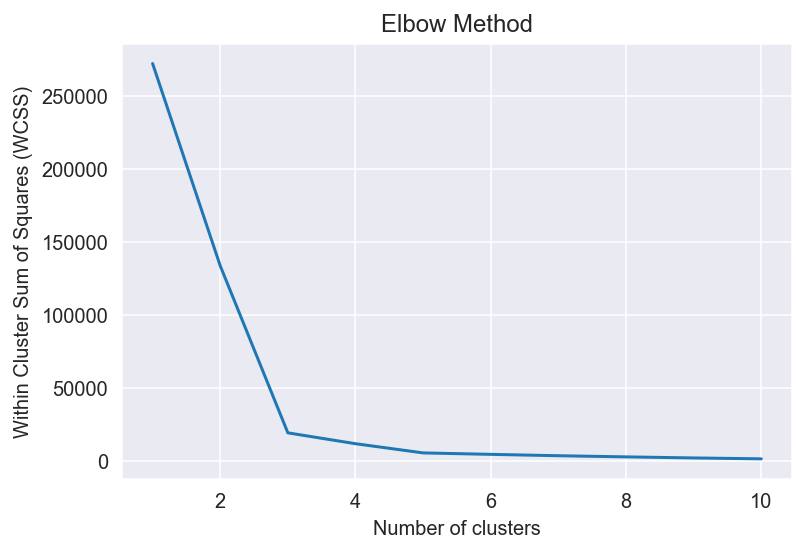

In [4]:
X = np.array(df.loc[:,['Beer Dataset',                # Choose your variable names
                       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']])    \
                        .reshape(-1, 2)

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

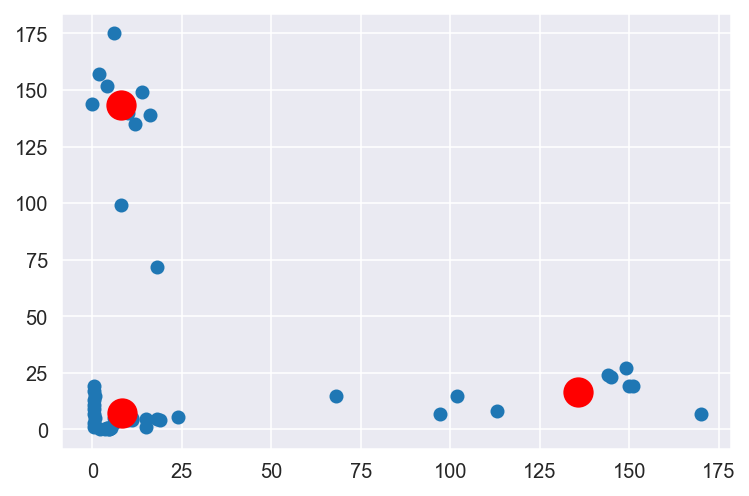

In [5]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()